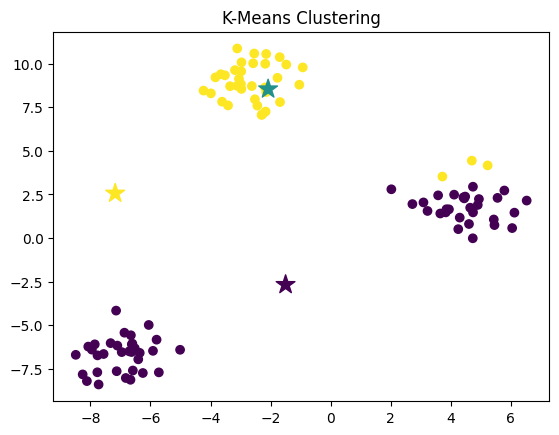

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


class KmeansClustering:

    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    def euclidean_dis(self, data_point, centroids):
        return np.sqrt(np.sum((centroids - data_point) ** 2, axis=1))

    def fit(self, X, max_iterations=200):
        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, X.shape[1]))

        for _ in range(max_iterations):
            y = []
            for data_point in X:
                dis = self.euclidean_dis(data_point, self.centroids)
                cluster_num = np.argmin(dis)
                y.append(cluster_num)

            y = np.array(y)
            cluster_ind = []

            for i in range(self.k):
                cluster_ind.append(np.argwhere(y == i))

            cluster_centers = []

            for i, ind in enumerate(cluster_ind):
                if len(ind) == 0:
                    cluster_centers.append(self.centroids[i])
                else:
                    cluster_centers.append(np.mean(X[ind], axis=0)[0])

            if np.max(self.centroids - np.array(cluster_centers)) < 0.0001:
                break
            else:
                self.centroids = np.array(cluster_centers)

        return y


n_samples = 100
n_features = 2
n_clusters = 3
random_points, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

kmean = KmeansClustering(k=3)
labels = kmean.fit(random_points)

plt.scatter(random_points[:, 0], random_points[:, 1], c=labels)
plt.scatter(kmean.centroids[:, 0], kmean.centroids[:, 1], c=range(len(kmean.centroids)), marker="*", s=200)
plt.title("K-Means Clustering")
plt.show()